In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
	accuracy_score, precision_score, recall_score, f1_score,
	confusion_matrix, roc_auc_score, classification_report, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('flattened_Street_dataset.csv')

In [3]:
X = df.drop('label', axis=1)
y = df['label']

In [4]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,label
0,0.062745,0.078431,0.105882,0.066667,0.070588,0.098039,0.062745,0.078431,0.101961,0.062745,...,0.070588,0.066667,0.098039,0.070588,0.066667,0.098039,0.070588,0.066667,0.098039,0
1,0.564706,0.666667,0.600000,0.588235,0.686275,0.607843,0.643137,0.705882,0.627451,0.631373,...,0.172549,0.200000,0.113725,0.176471,0.200000,0.117647,0.176471,0.200000,0.117647,0
2,0.619608,0.737255,0.811765,0.588235,0.717647,0.800000,0.490196,0.662745,0.756863,0.427451,...,0.090196,0.105882,0.133333,0.082353,0.094118,0.121569,0.078431,0.090196,0.117647,0
3,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.286275,0.345098,0.384314,0.286275,0.337255,0.372549,0.294118,0.337255,0.372549,0
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.301961,0.352941,0.372549,0.290196,0.349020,0.368627,0.290196,0.352941,0.368627,0


In [5]:
df.shape

(18159, 12289)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
model = RandomForestClassifier(n_estimators=40, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=42)

In [8]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] 

In [9]:
print(classification_report(y_test, y_pred, target_names=['good', 'holes']))

              precision    recall  f1-score   support

        good       0.93      0.96      0.95      2106
       holes       0.95      0.90      0.92      1526

    accuracy                           0.94      3632
   macro avg       0.94      0.93      0.94      3632
weighted avg       0.94      0.94      0.94      3632



In [10]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

results = pd.DataFrame({
'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
'Score': [f"{acc*100:.2f}%", f"{prec*100:.2f}%", f"{rec*100:.2f}%", f"{f1*100:.2f}%", f"{roc*100:.2f}%"]
})

print("Evaluation Metrics:\n")
print(results)

Evaluation Metrics:

      Metric   Score
0   Accuracy  93.75%
1  Precision  94.89%
2     Recall  89.97%
3   F1-Score  92.36%
4    ROC-AUC  98.26%


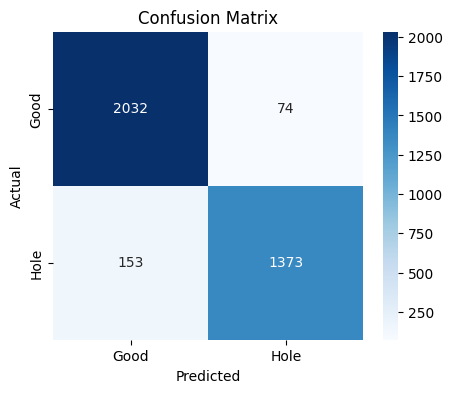

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Hole'], yticklabels=['Good', 'Hole'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

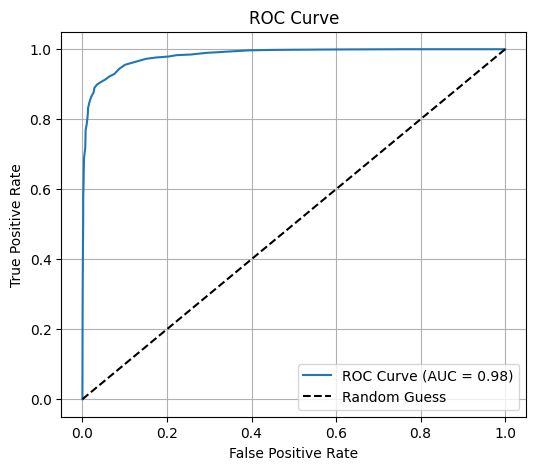

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

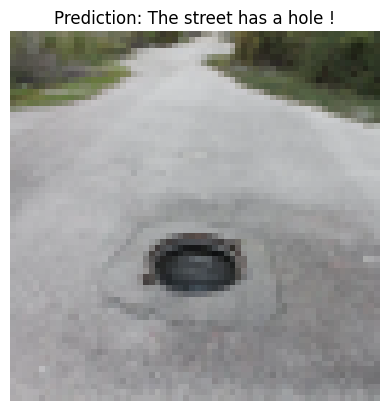

In [ ]:
from PIL import Image

# image size match X_train shape (64x64x3 = 12288)
img_width, img_height = 64, 64

img = Image.open(r"C:\Users\mousa\Downloads\street-hole-dangerous-missing-manhole-46085691.webp").convert('RGB')
img = img.resize((img_width, img_height))
img_array = np.array(img).astype(np.float32) / 255.0  # shape: (H, W, 3)
img_array = img_array.flatten()  # shape: (H*W*3,)

img_df = pd.DataFrame([img_array], columns=X_train.columns)

img_proba = model.predict_proba(img_df)[0, 1]
img_pred = model.predict(img_df)[0]

plt.imshow(img)
plt.title(f'Prediction: {"The street has a hole !" if img_pred else "It is a good street"}')
plt.axis('off')
plt.show()
